In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os
sys.path.append('..')

import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt

from get_data import get_data, get_splitted_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY

from misc.config import c
data_dir = c["DATA_DIR"]

import kaggle_ninja

In [75]:
kaggle_ninja.turn_on_force_reload_all()

loader = ["get_splitted_uniform_data",
             {"n_folds": 1,
              "seed":666,
              "test_size":0.0}]
preprocess_fncs = []

tiles = get_data([['5ht7', 'ExtFP']], loader, preprocess_fncs).values()[0][0][0]

X = tiles['X_train']['data']
y = tiles['Y_train']['data']
print X.shape
print y.shape

y = ObstructedY(y)

warm_start, _ = random_query(X, y, None, batch_size=100, seed=666)
y.query(warm_start)

al_ecml2015: 2015-06-04 17:28:44,672 - Running preprocess on 0 fold
al_ecml2015: 2015-06-04 17:28:44,672 - Wasn't able to set write/read flags


(3000, 2)
(3000,)


array([ 1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,
        1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.])

In [88]:
model = SVC(C=1, kernel='linear')
model.fit(X[warm_start], y[warm_start])

unc_pick, _ = uncertanity_sampling(X, y, model, batch_size=20, seed=666)
greedy_pick, greedy_score = quasi_greedy_batch(X, y, model, c=0.6, batch_size=20, seed=666, dist='cosine_distance_normalized')


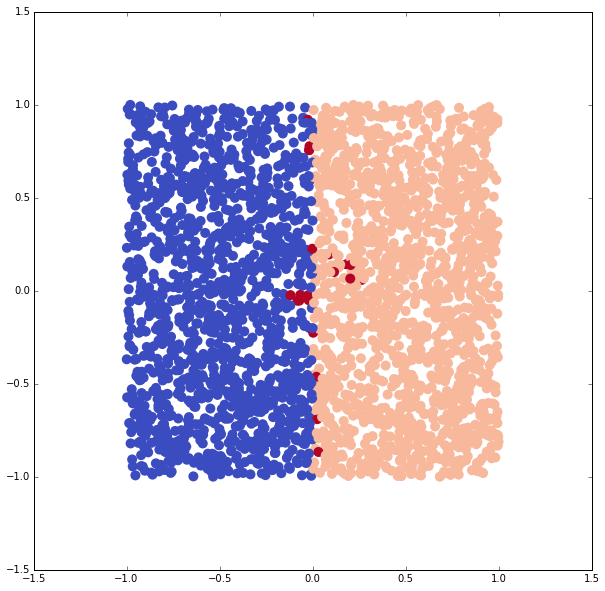

In [89]:
plt.figure(figsize=(10,10))
greedy_y = np.copy(y._y)
greedy_y[greedy_pick] = 2
plt.scatter(X[:,0], X[:,1], c=greedy_y, linewidths=0, cmap=plt.cm.coolwarm, s=100)

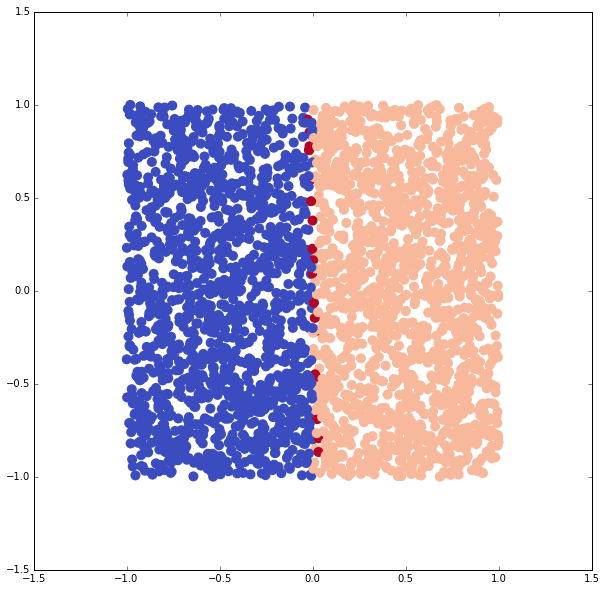

In [90]:
plt.figure(figsize=(10,10))
unc_y = np.copy(y._y)
unc_y[unc_pick] = 2
plt.scatter(X[:,0], X[:,1], c=unc_y, linewidths=0, cmap=plt.cm.coolwarm, s=100)

In [ ]:
from experiments.experiment_runner import run_experiment, run_experiment_grid
import experiments
from experiments import experiment_runner, fit_active_learning, fit_grid
from experiments.utils import get_best
from models.strategy import cosine_distance_normalized

from kaggle_ninja import *

grid_result_passive = run_experiment("fit_grid",
                                    recalculate_experiments=False,
                                    n_jobs = 1,
                                    experiment_detailed_name="fit_svm_passive_tiles",
                                    base_experiment="fit_active_learning",
                                    seed=666,
                                    grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                                   "base_model_kwargs:kernel": ['linear']},
                                    base_experiment_kwargs={"strategy": "random_query",
                                                       "loader_function": "get_splitted_uniform_data",
                                                       "batch_size": 20,
                                                       "base_model": "SVC",
                                                       "loader_args": {"n_folds": 2}})

In [5]:
grid_result_uncertainty = run_experiment("fit_grid",
                                    recalculate_experiments=False,
                                    n_jobs = 1,
                                    experiment_detailed_name="fit_svm_uncertainty_tiles",
                                    base_experiment="fit_active_learning",
                                    seed=666,
                                    grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                                   "base_model_kwargs:kernel": ['linear']},
                                    base_experiment_kwargs={"strategy": "uncertanity_sampling",
                                                       "loader_function": "get_splitted_uniform_data",
                                                       "batch_size": 20,
                                                       "base_model": "SVC",
                                                       "loader_args": {"n_folds": 2}})

fit_grid: 2015-06-04 17:38:56,535 - Added new config entry: "base_experiment_kwargs.base_model"
fit_active_learning: 2015-06-04 17:38:29,128 - Completed after 0:00:00
fit_grid: 2015-06-04 17:38:56,535 - Added new config entry: "base_experiment_kwargs.base_model"
fit_grid: 2015-06-04 17:38:56,536 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-04 17:38:56,536 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-04 17:38:56,536 - Added new config entry: "base_experiment_kwargs.loader_args"
fit_grid: 2015-06-04 17:38:56,536 - Added new config entry: "base_experiment_kwargs.loader_args"
fit_grid: 2015-06-04 17:38:56,537 - Added new config entry: "base_experiment_kwargs.loader_args.n_folds"
fit_grid: 2015-06-04 17:38:56,537 - Added new config entry: "base_experiment_kwargs.loader_args.n_folds"
fit_grid: 2015-06-04 17:38:56,538 - Added new config entry: "base_experiment_kwargs.loader_function"
fit_grid: 2015-06-04 17:38:56,538 - Adde

Loading  {'grid_params': {u'base_model_kwargs:kernel': ['linear'], u'base_model_kwargs:C': [1.0000000000000001e-05, 0.00012915496650148841, 0.0016681005372000592, 0.021544346900318846, 0.27825594022071259, 3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]}, 'n_jobs': 1, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_uncertainty_tiles', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_args': {u'n_folds': 2}, u'base_model': 'SVC', u'loader_function': 'get_splitted_uniform_data', u'batch_size': 20, u'strategy': 'uncertanity_sampling'}, 'seed': 666, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}


al_ecml2015: 2015-06-04 17:38:56,549 - Fitting fit_active_learning for 10 parameters combinations
fit_grid: 2015-06-04 17:38:57,623 - Completed after 0:00:01
fit_active_learning: 2015-06-04 17:38:56,742 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 17:38:56,748 - Added new config entry: "base_model_kwargs.kernel"
fit_active_learning: 2015-06-04 17:38:56,759 - Running command 'main'
fit_active_learning: 2015-06-04 17:38:56,766 - Started
fit_active_learning: 2015-06-04 17:38:56,769 - Fitting  fit_svm_uncertainty_tiles_subfit force_reload=False
fit_active_learning: 2015-06-04 17:38:56,780 - Read from cache fit_active_learning
fit_active_learning: 2015-06-04 17:38:56,782 - Completed after 0:00:00
fit_active_learning: 2015-06-04 17:38:56,794 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 17:38:56,794 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 17:38:56,801 - Added new config entry: "base_m

Saving  {'grid_params': {u'base_model_kwargs:kernel': ['linear'], u'base_model_kwargs:C': [1.0000000000000001e-05, 0.00012915496650148841, 0.0016681005372000592, 0.021544346900318846, 0.27825594022071259, 3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]}, 'n_jobs': 1, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_uncertainty_tiles', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_args': {u'n_folds': 2}, u'base_model': 'SVC', u'loader_function': 'get_splitted_uniform_data', u'batch_size': 20, u'strategy': 'uncertanity_sampling'}, 'seed': 666, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}
{u'loader_function': 'get_splitted_uniform_data', 'name': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_uncertainty_tiles_subfit', u'base_model_kwargs.kernel': 'linear', u'batch_size': 20, u'strategy': 'uncertanity_sampling', u'loader_args': {u'n_folds': 2}, u'base_model': 'SVC

fit_active_learning: 2015-06-04 17:38:57,276 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 17:38:57,276 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 17:38:57,276 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 17:38:57,276 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 17:38:57,276 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 17:38:57,278 - Added new config entry: "base_model_kwargs.kernel"
fit_active_learning: 2015-06-04 17:38:57,278 - Added new config entry: "base_model_kwargs.kernel"
fit_active_learning: 2015-06-04 17:38:57,278 - Added new config entry: "base_model_kwargs.kernel"
fit_active_learning: 2015-06-04 17:38:57,278 - Added new config entry: "base_model_kwargs.kernel"
fit_active_learning: 2015-06-04 17:38:57,278 - Added new config entry: "base_model_kwargs.kernel"
fit_active_learning: 2015-06-04 17:38:57,278 

In [11]:
from experiments.utils import *

grid_result_passive.experiments

[ExperimentResults(results={'mcc_valid': [0.0, 0.0], 'precision_valid': [0.0, 0.0], 'mean_mcc_train': 0.0, 'wac_valid': [0.5, 0.5], 'mean_mcc_valid': 0.0, 'mean_wac_valid': 0.5, 'mean_recall_valid': 0.0, 'precision_train': [0.0, 0.0], 'mean_precision_valid': 0.0, 'mean_wac_train': 0.5, 'mean_precision_train': 0.0, 'recall_train': [0.0, 0.0], 'recall_valid': [0.0, 0.0], 'mean_recall_train': 0.0, 'mcc_train': [0.0, 0.0], 'wac_train': [0.5, 0.5]}, dumps={}, monitors=[defaultdict(<type 'list'>, {'precision_score_unlabeled': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'n_already_labeled': [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500], 'recall_score_concept': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'wac_score_concept': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.